# Predicting the “Driving Style”

### Problem Description

Road safety rules and regulations are designed to prevent the citizens from fatal incidents. Although policies are in place, we observe negligent behavior of the drivers which lead to serious injuries or death crashes. It is of utmost interest of the authorities to understand and analyze human behavior to take necessary corrective and preventive actions.  

The stakeholders are the citizens, road transport authorities, Insurers and Researchers/Data service providers. In order to design a driving assistance system there is a need to get an understanding of the data on the driving patterns and broadly distinguish bad drivers from good ones. This in turn will benefit Insurers in analyzing underwriting risks, prevent frauds and designing No-claim-discount systems (NCD systems), etc. Additionally, the concerned authorities will need insights to design benchmarks for qualifications and driver licensing regulations, etc.


Every single vehicle is observed at various time stamps, to record the details of trips made, traffic conditions, vehicle details like length, weight, no of axles of the vehicle, road conditions, lanes switched, weather conditions etc. along with the driving styles are recorded. 

### Aggressive driver : 
The roads are often a dangerous place to be due to the number of people who choose not to drive safely. Roads are full of people who speed, don’t use turn signals, merge without warning, drive too close to other vehicles, honk and yell at other drivers and endanger the lives of not only themselves, but everyone else on the road through their reckless driving. People who drive without consideration for the safety of others on the road, sometimes even causing car accidents, are called aggressive drivers.



### “1” indicates : “Aggressive”, 
### “2” indicates : ”Normal” and 
### “3” indicates : “Vague” 


# Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing, metrics, cross_validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import squarify # for tree maps
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

C:\Users\panch\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

In [3]:
init_notebook_mode(connected=True)

# Reading train and test data

There are 3 csv files for Test and train data. 

In [4]:
# Change directory
path = os.getcwd() 
os.chdir( path )

## Train

In [5]:

train_data=pd.read_csv("Train.csv",na_values=["?",","])
print(train_data.shape)
vehicle_data=pd.read_csv("Train_Vehicletravellingdata.csv",na_values=["?",","])
print(vehicle_data.shape)
weather_data=pd.read_csv("Train_WeatherData.csv",na_values=["?",","])
print(weather_data.shape)

(12994, 5)
(162566, 10)
(162566, 9)


## Test

In [6]:
test_data=pd.read_csv("test.csv",na_values=["?",","])
print(test_data.shape)
vehicle_data_test=pd.read_csv("Test_Vehicletravellingdata.csv",na_values=["?",","])
print(vehicle_data_test.shape)
weather_data_test=pd.read_csv("Test_WeatherData.csv",na_values=["?",","])
print(weather_data_test.shape)

(4880, 4)
(61671, 10)
(61671, 9)


 #### Dataset has 20 features of data types categorical and numerical along with one target column. 

# View the Train and Test data

### Train Data

In [7]:
train_data.head(3)

,ID,V2,V5,V6,DrivingStyle
0,DR_24526,1265,10243,2,2
1,DR_30052,1680,30871,6,2
2,DR_40928,936,3224,4,2


In [8]:
test_data.head(3)

,ID,V2,V5,V6
0,DR_79986,574,1268,2
1,DR_82800,530,2379,2
2,DR_93526,1687,17648,5


### Vehicle Data

In [9]:
vehicle_data.head(3)

,ID,V1,V3,V4,V7,V8,V9,V10,V11,V18
0,DR_24526,2012-03-21 09:14:55,1,81,57227,87,16986,941,94.0,Dry
1,DR_24526,2012-03-21 09:15:07,1,88,57229,81,1708,551,11.0,Dry
2,DR_24526,2012-03-21 09:15:12,1,88,57230,88,22892,1698,4.0,Dry


In [10]:
vehicle_data_test.head(3)

,ID,V1,V3,V4,V7,V8,V9,V10,V11,V18
0,DR_79986,2012-03-21 10:30:27,1,87,57309,94,2511,547,83.0,Dry
1,DR_79986,2012-03-21 10:30:30,1,85,57310,87,15630,1821,2.0,Dry
2,DR_79986,2012-03-21 10:31:45,2,86,57308,78,14443,2048,175.0,Dry


### Weather Details

In [11]:
weather_data.tail(3)

,ID,V1,V12,V13,V14,V15,V16,V17,V19
162563,DR_69505,2013-04-30 16:55:21,9.0,rain,Low,91.0,45.0,8.0,night
162564,DR_56117,2013-04-30 16:55:23,9.0,snow,Moderate,91.0,45.0,8.0,night
162565,DR_56117,2013-04-30 16:57:08,9.0,snow,Moderate,91.0,45.0,8.0,night


In [12]:
weather_data_test.tail(3)

,ID,V1,V12,V13,V14,V15,V16,V17,V19
61668,DR_76701,2013-04-30 16:25:37,3.0,rain,Low,86.0,17.0,8.0,night
61669,DR_76701,2013-04-30 16:25:39,3.0,rain,Low,86.0,17.0,8.0,night
61670,DR_76701,2013-04-30 16:25:52,3.0,rain,Low,86.0,17.0,8.0,night


### Rename columns of all 3 cvs files

In [13]:
print(train_data.shape)
train_data.rename(columns={'ID':'id','V2':'vehicle_length', 'V5':'vehicle_weight', 'V6':'axles_no', 'DrivingStyle':'drivingstyle'}, inplace=True)
train_data.columns

(12994, 5)


Index(['id', 'vehicle_length', 'vehicle_weight', 'axles_no', 'drivingstyle'], dtype='object')

In [14]:
print(weather_data.shape)
weather_data.rename(columns={'ID':'id','V1':'trip_date_time','V12':'air_tempture','V13':'precipitation_type', 'V14':'precipitation_intnsty', 'V15':'relativ_humidity', 'V16':'wind_direction', 'V17':'wind_speed', 'V19':'light_condition'}, inplace=True)
weather_data.columns


(162566, 9)


Index(['id', 'trip_date_time', 'air_tempture', 'precipitation_type',
       'precipitation_intnsty', 'relativ_humidity', 'wind_direction',
       'wind_speed', 'light_condition'],
      dtype='object')

In [15]:
print(vehicle_data.shape)
vehicle_data.rename(columns={'ID':'id','V1':'trip_date_time', 'V3':'road_lane', 'V4':'vehicle_speed', 'V7':'preceed_vehicle_id', 'V8':'preceed_vehicle_speed', 'V9':'preceed_vehicle_wght', 'V10':'preceed_vehicle_lnght', 'V11':'time_gap', 'V18':'road_condition'}, inplace=True)
vehicle_data.columns


(162566, 10)


Index(['id', 'trip_date_time', 'road_lane', 'vehicle_speed',
       'preceed_vehicle_id', 'preceed_vehicle_speed', 'preceed_vehicle_wght',
       'preceed_vehicle_lnght', 'time_gap', 'road_condition'],
      dtype='object')

### Merge 3 csv files 

### ##Train##

In [16]:
vehicle_data.head()

,id,trip_date_time,road_lane,vehicle_speed,preceed_vehicle_id,preceed_vehicle_speed,preceed_vehicle_wght,preceed_vehicle_lnght,time_gap,road_condition
0,DR_24526,2012-03-21 09:14:55,1,81,57227,87,16986,941,94.0,Dry
1,DR_24526,2012-03-21 09:15:07,1,88,57229,81,1708,551,11.0,Dry
2,DR_24526,2012-03-21 09:15:12,1,88,57230,88,22892,1698,4.0,Dry
3,DR_24526,2012-03-21 09:15:48,2,84,57228,89,1945,544,127.0,Dry
4,DR_24526,2012-03-21 09:15:54,1,89,57231,88,13787,1893,42.0,Dry


In [17]:
weather_data.head()

,id,trip_date_time,air_tempture,precipitation_type,precipitation_intnsty,relativ_humidity,wind_direction,wind_speed,light_condition
0,DR_24526,2012-03-21 09:14:55,7.0,clear,None,95.0,146.0,1.0,daylight
1,DR_24526,2012-03-21 09:15:07,7.0,clear,None,95.0,124.0,0.0,daylight
2,DR_24526,2012-03-21 09:15:12,7.0,clear,None,95.0,124.0,0.0,daylight
3,DR_24526,2012-03-21 09:15:48,7.0,clear,None,95.0,124.0,0.0,daylight
4,DR_24526,2012-03-21 09:15:54,7.0,clear,None,95.0,124.0,0.0,daylight


In [18]:
train_data.head()

,id,vehicle_length,vehicle_weight,axles_no,drivingstyle
0,DR_24526,1265,10243,2,2
1,DR_30052,1680,30871,6,2
2,DR_40928,936,3224,4,2
3,DR_66033,1503,3315,4,2
4,DR_45266,929,3022,4,2


In [19]:
vehicle_wether=pd.merge(vehicle_data,weather_data, on=["id", "trip_date_time"])
train=pd.merge(vehicle_wether,train_data,on=["id"])
print(train.shape)
train.head()

(162566, 21)


,id,trip_date_time,road_lane,vehicle_speed,preceed_vehicle_id,preceed_vehicle_speed,preceed_vehicle_wght,preceed_vehicle_lnght,time_gap,road_condition,...,precipitation_type,precipitation_intnsty,relativ_humidity,wind_direction,wind_speed,light_condition,vehicle_length,vehicle_weight,axles_no,drivingstyle
0,DR_24526,2012-03-21 09:14:55,1,81,57227,87,16986,941,94.0,Dry,...,clear,None,95.0,146.0,1.0,daylight,1265,10243,2,2
1,DR_24526,2012-03-21 09:15:07,1,88,57229,81,1708,551,11.0,Dry,...,clear,None,95.0,124.0,0.0,daylight,1265,10243,2,2
2,DR_24526,2012-03-21 09:15:12,1,88,57230,88,22892,1698,4.0,Dry,...,clear,None,95.0,124.0,0.0,daylight,1265,10243,2,2
3,DR_24526,2012-03-21 09:15:48,2,84,57228,89,1945,544,127.0,Dry,...,clear,None,95.0,124.0,0.0,daylight,1265,10243,2,2
4,DR_24526,2012-03-21 09:15:54,1,89,57231,88,13787,1893,42.0,Dry,...,clear,None,95.0,124.0,0.0,daylight,1265,10243,2,2


### Data exploration

In [20]:
train.shape

(162566, 21)

### -There are 20 columns and 162566 rows , and multiple observation for each driver ID  
### - we have 2 option of picking the data set dimentions i.e : 
#### - 162566 rows after merging the data
#### - 12994 rows after grouping by 'id' with the mean 
#### Tried both options

In [21]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
road_lane,162566.0,1.500849,0.500001,1.0,1.00,2.0,2.00,2.0
vehicle_speed,162566.0,83.455483,9.375122,8.0,78.00,83.0,88.00,161.0
preceed_vehicle_id,162566.0,460124.263979,272271.224195,20.0,142983.25,594321.5,692362.75,794435.0
preceed_vehicle_speed,162566.0,83.458817,9.373120,0.0,78.00,83.0,88.00,161.0
preceed_vehicle_wght,162566.0,5017.562793,7399.315434,3.0,1502.00,1862.0,2669.00,69548.0
preceed_vehicle_lnght,162566.0,790.775285,481.944297,102.0,527.00,560.0,701.00,2981.0
time_gap,160111.0,105.340358,177.202269,1.0,7.00,43.0,125.00,1797.0
air_tempture,160509.0,4.654237,3.226701,-13.0,2.00,5.0,7.00,24.0
relativ_humidity,160461.0,60.647509,18.272899,16.0,46.00,58.0,76.00,97.0
wind_direction,160452.0,182.461178,88.927865,6.0,152.00,180.0,208.00,360.0


### Drop columns 'id', 'trip_date_time', 'preceed_vehicle_id'

In [22]:
# train.drop(columns=['id', 'trip_date_time', 'preceed_vehicle_id'],axis=1,inplace=True)
train.drop(columns=['trip_date_time'],axis=1,inplace=True)
train.shape

(162566, 20)

### check for NA percentage

In [23]:
percent_missing = train.isnull().sum() * 100 / len(train)
percent_missing

id                       0.000000
road_lane                0.000000
vehicle_speed            0.000000
preceed_vehicle_id       0.000000
preceed_vehicle_speed    0.000000
preceed_vehicle_wght     0.000000
preceed_vehicle_lnght    0.000000
time_gap                 1.510156
road_condition           0.000000
air_tempture             1.265332
precipitation_type       0.000000
precipitation_intnsty    0.000000
relativ_humidity         1.294859
wind_direction           1.300395
wind_speed               1.515692
light_condition          0.000000
vehicle_length           0.000000
vehicle_weight           0.000000
axles_no                 0.000000
drivingstyle             0.000000
dtype: float64

In [24]:
train['target'] = train['drivingstyle'].map({1:'aggressive', 2: 'normal', 3: 'vague'})

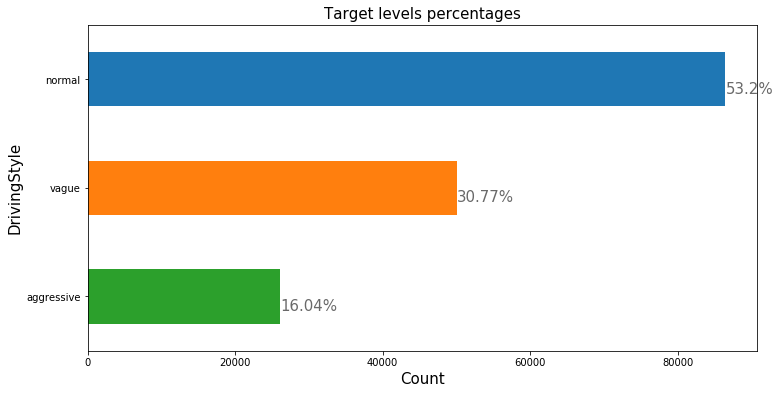

In [25]:
ax = train['target'].value_counts().plot(kind='barh', figsize= (12,6))
ax.set_title("Target levels percentages", fontsize=15)
ax.set_xlabel("Count", fontsize=15)
ax.set_ylabel("DrivingStyle", fontsize=15)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

plt.show()

#### Observation
1. Higest percentage of target levels among 3 is 'normal' and lowest is aggressive

### How speed of the vehicle varies according to Road condtions

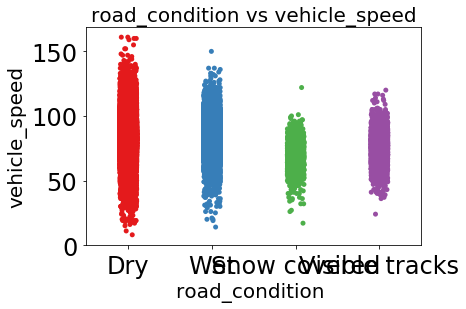

In [26]:
sns.set_context("paper", font_scale=3, rc={"font.size":8,"axes.labelsize":5})
ax = sns.stripplot(x="road_condition", y="vehicle_speed", jitter=True, palette='Set1', data=train );
ax.set_title("road_condition vs vehicle_speed", fontsize=20)
ax.set_xlabel("road_condition ", fontsize=20)
ax.set_ylabel("vehicle_speed", fontsize=20)
plt.show()

#### Observation
1. We can observe that speed ranges from very low to high when Road condition is dry ,
2. when wet, speed < 140kph most of the cases 
3. snow covered road speed maintained from 20+ KPH to ~100kph.
4. when road clearly visible, minimum speed maintained looks like 40kph+

### How speed of vehicle varies according to Weather precipitation type

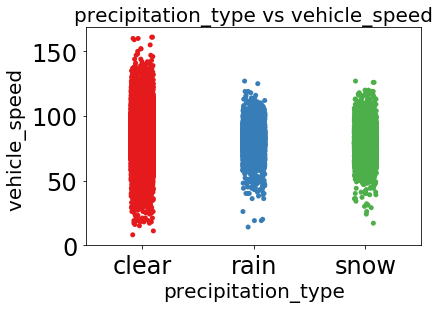

In [27]:
sns.set_context("paper", font_scale=3, rc={"font.size":8,"axes.labelsize":5})
ax = sns.stripplot(x="precipitation_type", y="vehicle_speed", palette='Set1', jitter=True, data=train);
ax.set_title("precipitation_type vs vehicle_speed", fontsize=20)
ax.set_xlabel("precipitation_type", fontsize=20)
ax.set_ylabel("vehicle_speed ", fontsize=20)
plt.show()

#### Observation
1. We can observe that speed ranges from very low to high when precipitaion type is clear ,
2. when rain, speed < 140kph most of the cases 
3. snow covered road speed maintained from 40+ KPH to ~120kph.

###  How vehicle weight impacts vehicle speed on differnt road conditions ('Dry', 'Wet', 'Visible tracks','Snow covered')

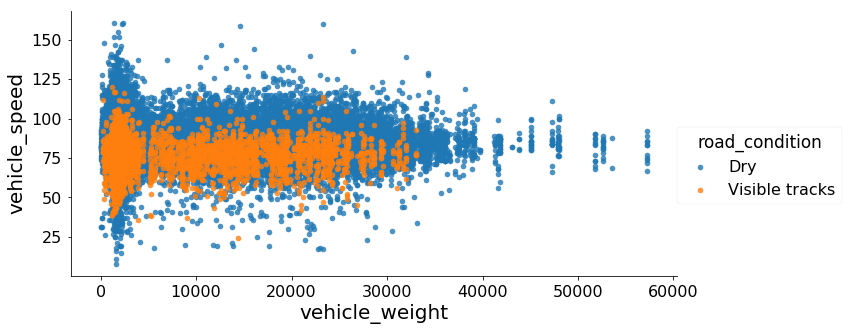

In [28]:
sns.set_context("paper", font_scale=2, rc={"figure.figsize":(11.7, 10),"font.size":20,"axes.labelsize":20,
                                           "axes.titlesize":20})


sns.lmplot(x='vehicle_weight', y='vehicle_speed', hue='road_condition',aspect=2,size=5,
           data=train.loc[train['road_condition'].isin(['Dry', 'Visible tracks'])], 
           fit_reg=False)

#### Observation
1. vehicle speed is high for low weight , as weight increases speed dicreases , when road condition is Dry,
2. and road condion is in visible tarcks , heavy veicles observations are less , means they may stop their vehicle for movement or observations might be less for heaviour vehicles here.

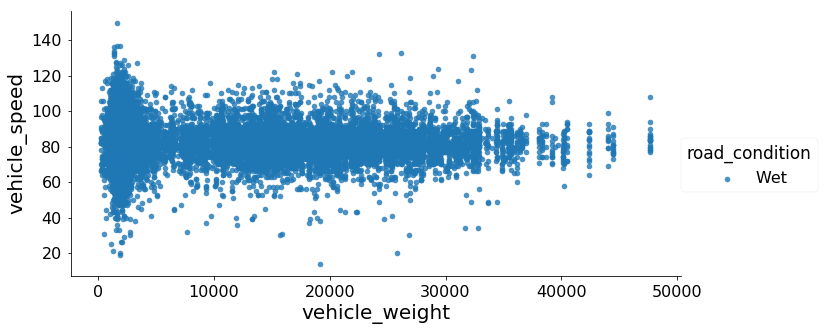

In [29]:
sns.set_context("paper", font_scale=2, rc={"figure.figsize":(11.7, 10),"font.size":20,"axes.labelsize":20,
                                           "axes.titlesize":20})

sns.lmplot(x='vehicle_weight', y='vehicle_speed', hue='road_condition',aspect=2,size=5,
           data=train.loc[train['road_condition'].isin(['Wet'])], 
           fit_reg=False)

3. In wet road condition, variation speed is less of vehicles which have weight between 10000 to < 30000

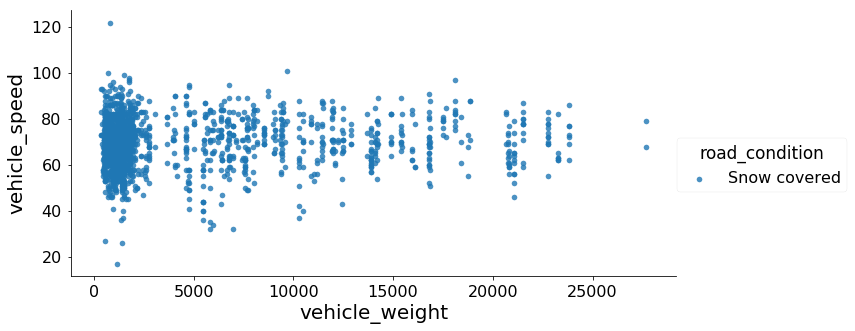

In [30]:
sns.set_context("paper", font_scale=2, rc={"figure.figsize":(11.7, 10),"font.size":20,"axes.labelsize":20,
                                           "axes.titlesize":20})
sns.lmplot(x='vehicle_weight', y='vehicle_speed', hue='road_condition',aspect=2,size=5,
           data=train.loc[train['road_condition'].isin(['Snow covered'])], 
           fit_reg=False)

4. We could see that light weight vehicle maximum speed 100kph when road is snow covered

### How vehicle lenght impacts vehicle speed on differnt Light conditions ('daylight', 'twilight', 'night') on the time of the day

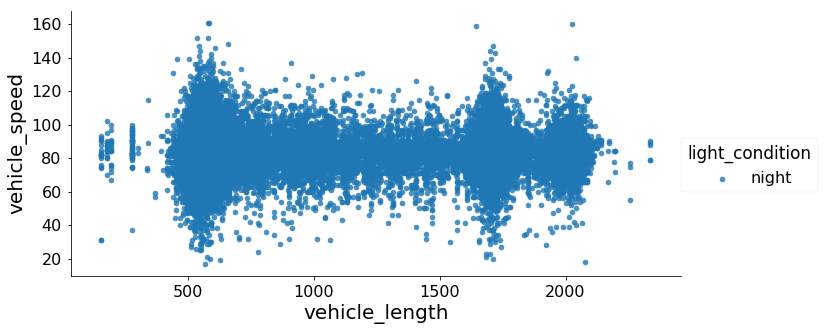

In [31]:
sns.lmplot(x='vehicle_length', y='vehicle_speed', hue='light_condition',aspect=2,size=5,
           data=train.loc[train['light_condition'].isin(['night'])], 
           fit_reg=False)

### Observation
1. From above graph, speed is 120kph+ for vehicles length 500+ cm and ~1700 cm and lenghty vehicles(~2000cm), speed variation is less in night time

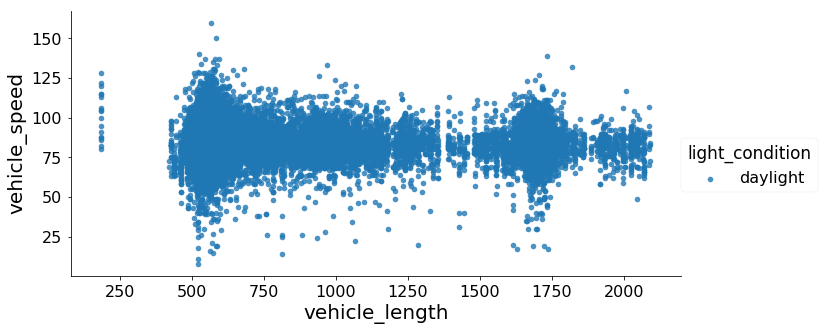

In [32]:
sns.lmplot(x='vehicle_length', y='vehicle_speed', hue='light_condition',aspect=2,size=5,
           data=train.loc[train['light_condition'].isin(['daylight'])], 
           fit_reg=False)

### How vehicle lenght impacts vehicle speed on differnt weather types conditions ('clear', 'rain', 'snow') on the time of the day

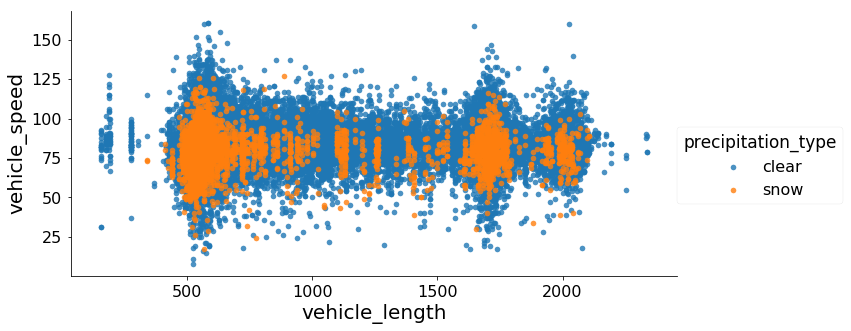

In [33]:

sns.lmplot(x='vehicle_length', y='vehicle_speed', hue='precipitation_type',aspect=2,size=5,
           data=train.loc[train['precipitation_type'].isin(['clear', 'snow'])], 
           fit_reg=False)

### Observation
1. Vehicles of length < 500 cm, might not do travel in snow weather condition, could see vehicles of length > 2000cm doesnt go above 120kph even in clear weather

### Relation between Weather and Road condition

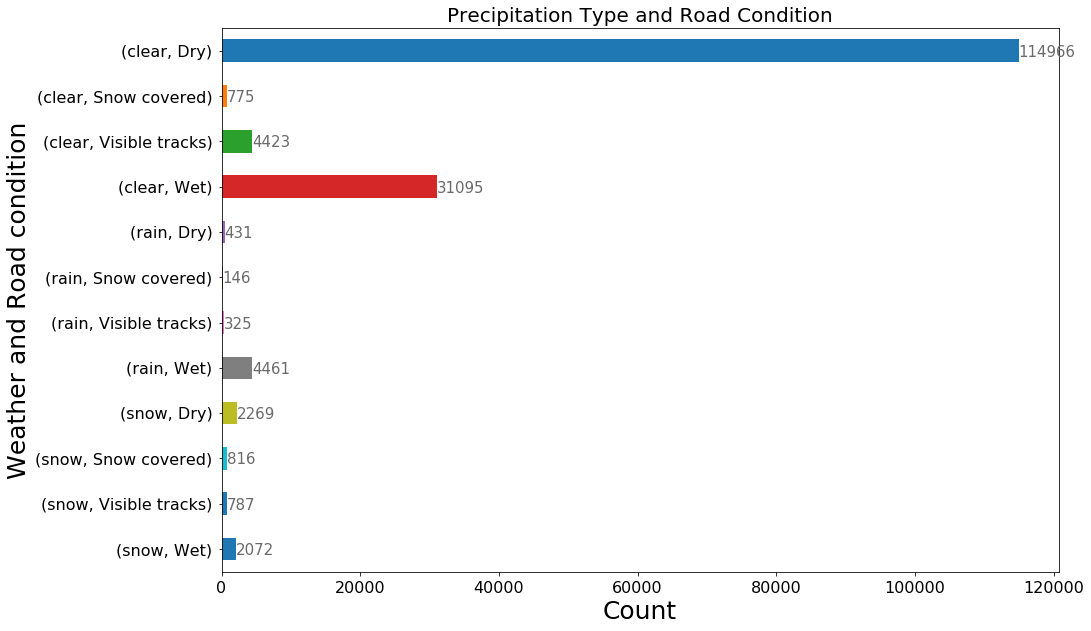

In [34]:

ax = train.groupby(['precipitation_type','road_condition']).size().plot(kind='barh', figsize=(15,10), fontsize=16,
                                                                  title= 'Precipitation Type and Road Condition')

ax.set_ylabel("Weather and Road condition", fontsize=25)
ax.set_xlabel("Count", fontsize=25)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2)), fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

plt.show()

### Observation
1. from above plot, we could see clear and Dry observations are more compared to other weather and road conditions combinations, which might lead to bias

### Relation between Weather , Road and Light condition

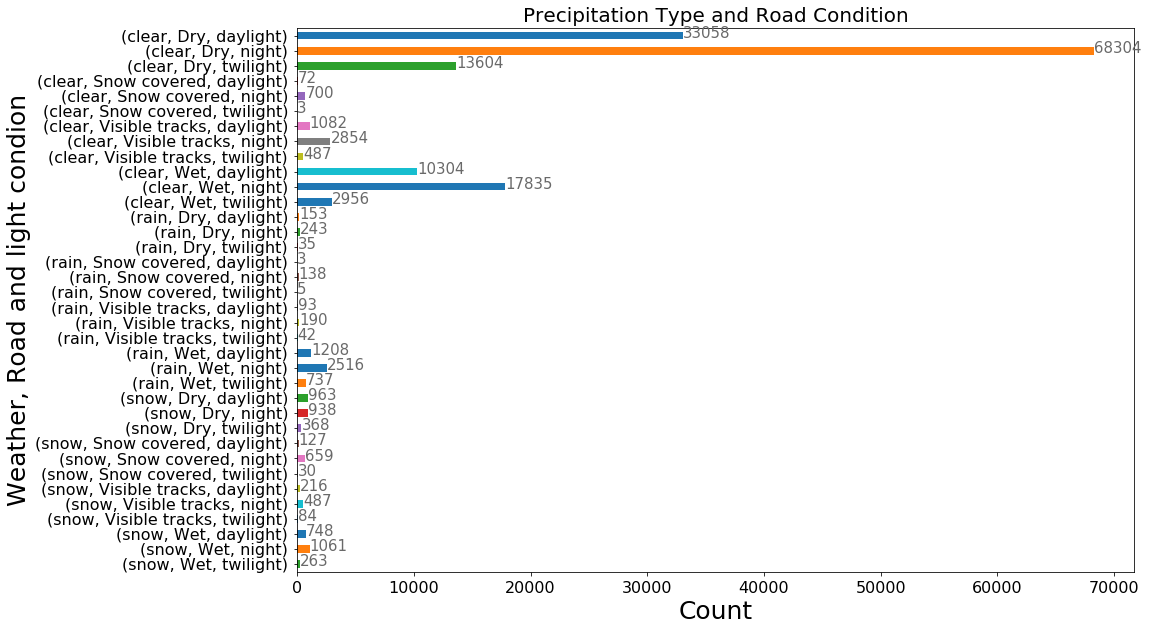

In [35]:
ax = train.groupby(['precipitation_type','road_condition', 'light_condition']).size().plot(kind='barh', figsize=(15,10), fontsize=16,
                                                                  title= 'Precipitation Type and Road Condition')


ax.set_ylabel("Weather, Road and light condion", fontsize=25)
ax.set_xlabel("Count", fontsize=25)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2)), fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

plt.show()

### Observation
1. From above plot, we can see clear,dry,night observations are high compared other combination of weather type,road conditon and day light condition

### Relation between Weather and Road condition w.r.t Driving style 

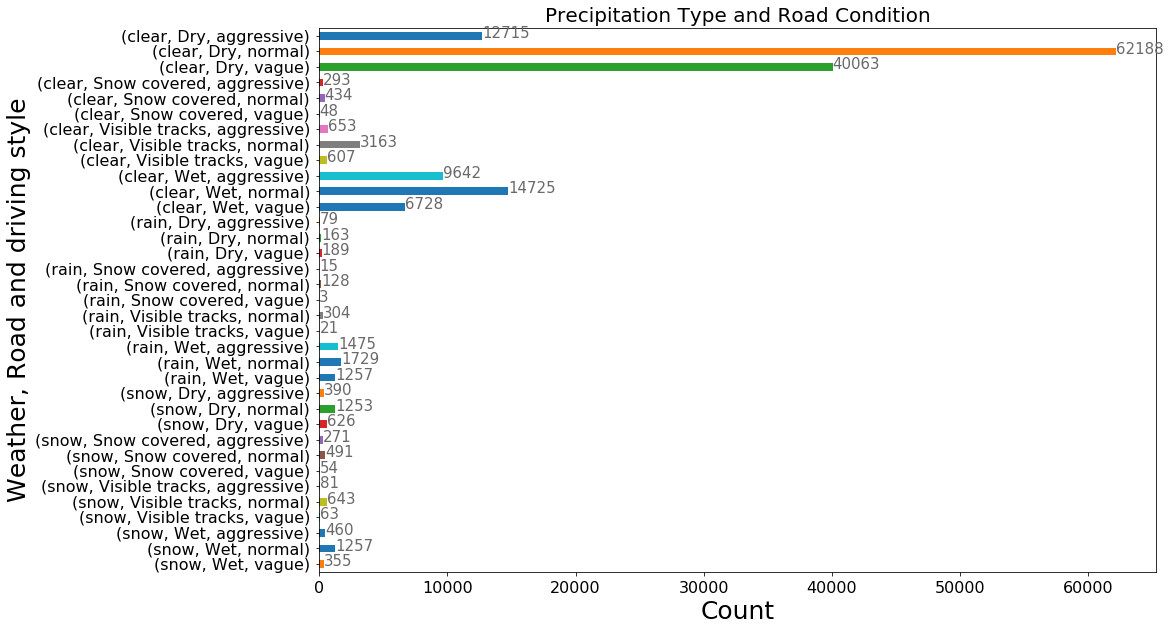

In [36]:
ax = train.groupby(['precipitation_type','road_condition', 'target']).size().plot(kind='barh', figsize=(15,10), fontsize=16,
                                                                  title= 'Precipitation Type and Road Condition')


ax.set_ylabel("Weather, Road and driving style", fontsize=25)
ax.set_xlabel("Count", fontsize=25)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2)), fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

plt.show()
train.drop('target', inplace=True, axis=1)

### Observation
1. From above plot, we can see clear,dry,normal driving observations are high compared other combination of weather type,road conditon and day light condition

### Data preprocessing 

#### Impute NA's with mean()

In [37]:

train['time_gap'].fillna(train['time_gap'].mean(),inplace=True)

train['air_tempture'].fillna(train['air_tempture'].mean(),inplace=True)

train['relativ_humidity'].fillna(train['relativ_humidity'].mean(),inplace=True)

train['wind_direction'].fillna(train['wind_direction'].mean(),inplace=True)

train['wind_speed'].fillna(train['wind_speed'].mean(),inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162566 entries, 0 to 162565
Data columns (total 20 columns):
id                       162566 non-null object
road_lane                162566 non-null int64
vehicle_speed            162566 non-null int64
preceed_vehicle_id       162566 non-null int64
preceed_vehicle_speed    162566 non-null int64
preceed_vehicle_wght     162566 non-null int64
preceed_vehicle_lnght    162566 non-null int64
time_gap                 162566 non-null float64
road_condition           162566 non-null object
air_tempture             162566 non-null float64
precipitation_type       162566 non-null object
precipitation_intnsty    162566 non-null object
relativ_humidity         162566 non-null float64
wind_direction           162566 non-null float64
wind_speed               162566 non-null float64
light_condition          162566 non-null object
vehicle_length           162566 non-null int64
vehicle_weight           162566 non-null int64
axles_no                 162

In [38]:
train.isna().sum()

id                       0
road_lane                0
vehicle_speed            0
preceed_vehicle_id       0
preceed_vehicle_speed    0
preceed_vehicle_wght     0
preceed_vehicle_lnght    0
time_gap                 0
road_condition           0
air_tempture             0
precipitation_type       0
precipitation_intnsty    0
relativ_humidity         0
wind_direction           0
wind_speed               0
light_condition          0
vehicle_length           0
vehicle_weight           0
axles_no                 0
drivingstyle             0
dtype: int64

### List categorical and numerical attributes

#### categorical list

In [39]:
train_cat = train.select_dtypes(['object','category'])

for x in train_cat:
    train[x] = train[x].astype('category') 

cat_list = list(train.select_dtypes(include=['category']).columns)
print("LIST:" ,cat_list)

LIST: ['id', 'road_condition', 'precipitation_type', 'precipitation_intnsty', 'light_condition']


##### Covert categorical into codes

In [40]:
## dummyfy
train[cat_list]= train[cat_list].apply(lambda x: x.cat.codes)
#train[cat_list]

In [41]:
print(train.shape)
train.head()


(162566, 20)


,id,road_lane,vehicle_speed,preceed_vehicle_id,preceed_vehicle_speed,preceed_vehicle_wght,preceed_vehicle_lnght,time_gap,road_condition,air_tempture,precipitation_type,precipitation_intnsty,relativ_humidity,wind_direction,wind_speed,light_condition,vehicle_length,vehicle_weight,axles_no,drivingstyle
0,2659,1,81,57227,87,16986,941,94.0,0,7.0,0,4,95.0,146.0,1.0,0,1265,10243,2,2
1,2659,1,88,57229,81,1708,551,11.0,0,7.0,0,4,95.0,124.0,0.0,0,1265,10243,2,2
2,2659,1,88,57230,88,22892,1698,4.0,0,7.0,0,4,95.0,124.0,0.0,0,1265,10243,2,2
3,2659,2,84,57228,89,1945,544,127.0,0,7.0,0,4,95.0,124.0,0.0,0,1265,10243,2,2
4,2659,1,89,57231,88,13787,1893,42.0,0,7.0,0,4,95.0,124.0,0.0,0,1265,10243,2,2


### ##Test##

#### Rename Test Csv files columns

In [42]:
print(test_data.shape)
test_data.rename(columns={'ID':'id','V2':'vehicle_length', 'V5':'vehicle_weight', 'V6':'axles_no', 'DrivingStyle':'drivingstyle'}, inplace=True)
test_data.columns

(4880, 4)


Index(['id', 'vehicle_length', 'vehicle_weight', 'axles_no'], dtype='object')

In [43]:
print(weather_data_test.shape)
weather_data_test.rename(columns={'ID':'id','V1':'trip_date_time','V12':'air_tempture','V13':'precipitation_type', 'V14':'precipitation_intnsty', 'V15':'relativ_humidity', 'V16':'wind_direction', 'V17':'wind_speed', 'V19':'light_condition'}, inplace=True)
weather_data_test.columns


(61671, 9)


Index(['id', 'trip_date_time', 'air_tempture', 'precipitation_type',
       'precipitation_intnsty', 'relativ_humidity', 'wind_direction',
       'wind_speed', 'light_condition'],
      dtype='object')

In [44]:
print(vehicle_data_test.shape)
vehicle_data_test.rename(columns={'ID':'id','V1':'trip_date_time', 'V3':'road_lane', 'V4':'vehicle_speed', 'V7':'preceed_vehicle_id', 'V8':'preceed_vehicle_speed', 'V9':'preceed_vehicle_wght', 'V10':'preceed_vehicle_lnght', 'V11':'time_gap', 'V18':'road_condition'}, inplace=True)
vehicle_data_test.columns


(61671, 10)


Index(['id', 'trip_date_time', 'road_lane', 'vehicle_speed',
       'preceed_vehicle_id', 'preceed_vehicle_speed', 'preceed_vehicle_wght',
       'preceed_vehicle_lnght', 'time_gap', 'road_condition'],
      dtype='object')

####  Merge 3 csv

In [45]:
vehicle_wether_test=pd.merge(vehicle_data_test,weather_data_test, on=["id", "trip_date_time"])
print(vehicle_wether_test.shape)
test=pd.merge(vehicle_wether_test,test_data,on=["id"])
test.shape

(61671, 17)


(61671, 20)

#### Drop columns 'id', 'trip_date_time', 'preceed_vehicle_id'

In [46]:
test.drop(columns=['trip_date_time'],axis=1,inplace=True)

#### check for NA percentage

In [47]:
percent_missing1 = test.isnull().sum() * 100 / len(test)
percent_missing1

id                       0.000000
road_lane                0.000000
vehicle_speed            0.000000
preceed_vehicle_id       0.000000
preceed_vehicle_speed    0.000000
preceed_vehicle_wght     0.000000
preceed_vehicle_lnght    0.000000
time_gap                 1.550161
road_condition           0.000000
air_tempture             1.514488
precipitation_type       0.000000
precipitation_intnsty    0.000000
relativ_humidity         1.529082
wind_direction           1.563133
wind_speed               1.593942
light_condition          0.000000
vehicle_length           0.000000
vehicle_weight           0.000000
axles_no                 0.000000
dtype: float64

#### Impute by mean

In [48]:
test['time_gap'].fillna(test['time_gap'].mean(),inplace=True)

test['air_tempture'].fillna(test['air_tempture'].mean(),inplace=True)

test['relativ_humidity'].fillna(test['relativ_humidity'].mean(),inplace=True)

test['wind_direction'].fillna(test['wind_direction'].mean(),inplace=True)

test['wind_speed'].fillna(test['wind_speed'].mean(),inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61671 entries, 0 to 61670
Data columns (total 19 columns):
id                       61671 non-null object
road_lane                61671 non-null int64
vehicle_speed            61671 non-null int64
preceed_vehicle_id       61671 non-null int64
preceed_vehicle_speed    61671 non-null int64
preceed_vehicle_wght     61671 non-null int64
preceed_vehicle_lnght    61671 non-null int64
time_gap                 61671 non-null float64
road_condition           61671 non-null object
air_tempture             61671 non-null float64
precipitation_type       61671 non-null object
precipitation_intnsty    61671 non-null object
relativ_humidity         61671 non-null float64
wind_direction           61671 non-null float64
wind_speed               61671 non-null float64
light_condition          61671 non-null object
vehicle_length           61671 non-null int64
vehicle_weight           61671 non-null int64
axles_no                 61671 non-null int64
dt

In [49]:
test.isnull().sum()

id                       0
road_lane                0
vehicle_speed            0
preceed_vehicle_id       0
preceed_vehicle_speed    0
preceed_vehicle_wght     0
preceed_vehicle_lnght    0
time_gap                 0
road_condition           0
air_tempture             0
precipitation_type       0
precipitation_intnsty    0
relativ_humidity         0
wind_direction           0
wind_speed               0
light_condition          0
vehicle_length           0
vehicle_weight           0
axles_no                 0
dtype: int64

### Test data: List categorical and numerical attributes

#### categorical list

In [50]:
test_cat = test.select_dtypes(['object','category'])

for x in test_cat:
    test[x] = test[x].astype('category') 

cat_list1 = list(test.select_dtypes(include=['category']).columns)
print("LIST:" ,cat_list1)

LIST: ['id', 'road_condition', 'precipitation_type', 'precipitation_intnsty', 'light_condition']


#### Covert categorical into codes

In [51]:
## dummyfy
test[cat_list1]= test[cat_list1].apply(lambda x: x.cat.codes)


In [52]:
print(test.shape)
test.head()

(61671, 19)


,id,road_lane,vehicle_speed,preceed_vehicle_id,preceed_vehicle_speed,preceed_vehicle_wght,preceed_vehicle_lnght,time_gap,road_condition,air_tempture,precipitation_type,precipitation_intnsty,relativ_humidity,wind_direction,wind_speed,light_condition,vehicle_length,vehicle_weight,axles_no
0,954,1,87,57309,94,2511,547,83.0,0,8.0,0,4,95.0,174.0,4.0,0,574,1268,2
1,954,1,85,57310,87,15630,1821,2.0,0,8.0,0,4,95.0,174.0,4.0,0,574,1268,2
2,954,2,86,57308,78,14443,2048,175.0,0,8.0,0,4,95.0,174.0,4.0,0,574,1268,2
3,954,2,113,57312,86,1615,557,8.0,0,8.0,0,4,95.0,174.0,4.0,0,574,1268,2
4,954,1,92,57311,85,8800,1233,88.0,0,8.0,0,4,95.0,174.0,4.0,0,574,1268,2


### split data

In [53]:
# Divide in to train and test
y=train["drivingstyle"]
X=train.drop('drivingstyle', axis=1)

#from sklearn.model_selection import train_test_split  
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20)  

In [54]:
print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(130052, 19)
(32514, 19)
(130052,)
(32514,)


In [55]:
print(y_train.value_counts())
y_validation.value_counts()

2    69181
3    40012
1    20859
Name: drivingstyle, dtype: int64


2    17297
3    10002
1     5215
Name: drivingstyle, dtype: int64

# Build Model

### LR

In [56]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_validation)

In [57]:
print("Accuracy: %s%%" % (100*accuracy_score(y_validation, y_pred)))
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

Accuracy: 53.95829488835579%
[[ 1095  4119     1]
 [  843 16444    10]
 [  511  9486     5]]
             precision    recall  f1-score   support

          1       0.45      0.21      0.29      5215
          2       0.55      0.95      0.69     17297
          3       0.31      0.00      0.00     10002

avg / total       0.46      0.54      0.42     32514



###  Random Forest Model

##### Cross validation

In [58]:
seed = 7
num_folds = 10

# Params for Random Forest
num_trees = 100
max_features = 3
models = []
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))

# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


RF: 0.954818 (0.002846)


As RandomForest model accuracy is more comparitive to other models, we can finalize the model RF

In [59]:
random_forest = RandomForestClassifier(n_estimators=50,max_features=5)
random_forest.fit(X_train, y_train)
predictions_rf = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(y_validation, predictions_rf)))
print('----------------')
print(confusion_matrix(y_validation, predictions_rf))
print('----------------')
print(classification_report(y_validation, predictions_rf))

Accuracy: 97.67792335609275%
----------------
[[ 5049   128    38]
 [   98 16956   243]
 [   54   194  9754]]
----------------
             precision    recall  f1-score   support

          1       0.97      0.97      0.97      5215
          2       0.98      0.98      0.98     17297
          3       0.97      0.98      0.97     10002

avg / total       0.98      0.98      0.98     32514



### Prediction on test data

In [60]:
final_pred.dtypes

NameError: name 'final_pred' is not defined

In [ ]:
# predication on  test data 
from scipy import stats
predictions = random_forest.predict(test)
print(len(predictions))
final_pred = pd.DataFrame()
final_pred['ID']= test['id']
final_pred['DrivingStyle']= predictions
print(final_pred.shape)

final_pred['ID']=final_pred['ID'].astype('str')
#final_pred['DrivingStyle']=final_pred['DrivingStyle'].astype('str')

pred_test = final_pred.groupby(['ID'], as_index=False, sort=False).agg(lambda x: stats.mode(x)[0][0])
pred_test.head()

print(pred_test.shape)
final_pred.head()

pred_test.to_csv('samplesubmission-1549798733763.csv', index=False)

### target levels count in predictions

In [ ]:
ax = pred_test['DrivingStyle'].value_counts().plot(kind='barh', figsize= (12,6))
ax.set_title("DrivingStyle levels percentages", fontsize=15)
ax.set_xlabel("Count", fontsize=15)
ax.set_ylabel("DrivingStyle", fontsize=15)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

plt.show()